In [1]:
# 查看westat版本号和安装路径
import westat
print('version:',westat.__version__)
print('path:',westat.__path__)

version: 0.1.10
path: ['C:\\Python\\Python311\\Lib\\site-packages\\westat']


## 一、数据准备

In [2]:
from westat import *

data=credit_card()
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# 将目标变量重命名为“y”
data.rename(columns={'target':'y'},inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 二、数据探索

In [4]:
# 查看数据
proc_means(data,['LIMIT_BAL','AGE'])

,Variable,N,Mean,Std Dev,Minimum,Maximum
0,LIMIT_BAL,30000,167484.32,129747.66,10000.0,1000000.0
1,AGE,30000,35.49,9.22,21.0,79.0


In [5]:
# 查看数据详情
get_data_desc(data).head(20)

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,4.500150e+08,1.0,15000.50,7500.75,15000.5,22500.25,30000.0,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,...,5.024530e+09,10000.0,167484.32,50000.00,140000.0,240000.00,1000000.0,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,4.811200e+04,1.0,1.60,1.00,2.0,2.00,2.0,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,5.559400e+04,0.0,1.85,1.00,2.0,2.00,6.0,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,4.655600e+04,0.0,1.55,1.00,2.0,2.00,3.0,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,...,1.064565e+06,21.0,35.49,28.00,34.0,41.00,79.0,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-5.010000e+02,-2.0,-0.02,-1.00,0.0,0.00,8.0,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-4.013000e+03,-2.0,-0.13,-1.00,0.0,0.00,8.0,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-4.986000e+03,-2.0,-0.17,-1.00,0.0,0.00,8.0,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-6.620000e+03,-2.0,-0.22,-1.00,0.0,0.00,8.0,0.0,-1.0,-2.0


In [6]:
# 查看指定的统计结果
get_data_desc(data,key=['#Mean'])

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Mean
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,100.00%,15000.50
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,0.27%,167484.32
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,0.01%,1.60
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,0.02%,1.85
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,0.01%,1.55
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%,35.49
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.02
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.13
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.17
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.22


In [7]:
# 查看数据详细信息，指定缺失值和数据精度
get_data_desc(data,missing=[],precision=0)

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100%,0,0%,30000,...,4.500150e+08,1.0,15000.0,7501.0,15000.0,22500.0,30000.0,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100%,0,0%,81,...,5.024530e+09,10000.0,167484.0,50000.0,140000.0,240000.0,1000000.0,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100%,0,0%,2,...,4.811200e+04,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100%,0,0%,7,...,5.559400e+04,0.0,2.0,1.0,2.0,2.0,6.0,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100%,0,0%,4,...,4.655600e+04,0.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100%,0,0%,56,...,1.064565e+06,21.0,35.0,28.0,34.0,41.0,79.0,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100%,0,0%,11,...,-5.010000e+02,-2.0,-0.0,-1.0,0.0,0.0,8.0,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100%,0,0%,11,...,-4.013000e+03,-2.0,-0.0,-1.0,0.0,0.0,8.0,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100%,0,0%,11,...,-4.986000e+03,-2.0,-0.0,-1.0,0.0,0.0,8.0,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100%,0,0%,11,...,-6.620000e+03,-2.0,-0.0,-1.0,0.0,0.0,8.0,0.0,-1.0,-2.0


In [8]:
# 查看数据详细信息，显示更多描述性统计信息，并以中文显示标题
get_data_desc(data,key=['#Sum','#Min','#Q1','#Median','#Q3','#Max','#Mode','#Var','#Std','#Mean','#Kurt','#Skew','#StdMean','#Range','#Cv','#Sum_of_squares','Top1','Top2','Top3'],missing=[],language='cn')

,名称,描述,类型,角色,#数量,#N,%N,#缺失值,%缺失值,#唯一值,...,#均值,#峰度,#偏度,#标准误差,#极差,#变异系数,#平方和,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,15000.50,-1.20,0.00,50.00,29999.0,57.73%,9.000450e+12,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,...,167484.32,0.54,0.99,749.10,990000.0,77.47%,1.346547e+15,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,1.60,-1.82,-0.42,0.00,1.0,30.50%,8.433600e+04,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,1.85,2.08,0.97,0.00,6.0,42.65%,1.217620e+05,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,1.55,-1.36,-0.02,0.00,3.0,33.63%,8.042200e+04,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,...,35.49,0.04,0.73,0.05,58.0,25.98%,4.032563e+07,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.02,2.72,0.73,0.01,10.0,-6729.35%,3.789500e+04,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.13,1.57,0.79,0.01,10.0,-894.98%,4.353300e+04,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.17,2.08,0.84,0.01,10.0,-720.14%,4.380200e+04,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.22,3.50,1.00,0.01,10.0,-529.82%,4.246600e+04,0.0,-1.0,-2.0


In [9]:
# 创建一个包含特征英文名 Name ，特征中文名 Label的 DataFrame
## 设置列的数据字典，包含Name 和Label 两列，用于保存特征英文名称，特征中文名称
col_dict = pd.DataFrame(data={'Name':['LIMIT_BAL','AGE','PAY_0'],'Label':['授信余额','年龄','支付金额']})

#在数据描述中展示特征中文名
get_data_describe(data,col_dict)

C:\Python\Python311\Lib\site-packages\westat\get_data_describe.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Describe'][result.iloc[:, -1].notnull()] = result.iloc[:, -1]


,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Sum,#Min,#Mean,#Q1,#Median,#Q3,#Max,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,4.500150e+08,1.0,15000.50,7500.75,15000.5,22500.25,30000.0,1.0,19997.0,20009.0
1,LIMIT_BAL,授信余额,float64,feature,30000,30000,100.00%,0,0.00%,81,...,5.024530e+09,10000.0,167484.32,50000.00,140000.0,240000.00,1000000.0,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,4.811200e+04,1.0,1.60,1.00,2.0,2.00,2.0,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,5.559400e+04,0.0,1.85,1.00,2.0,2.00,6.0,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,4.655600e+04,0.0,1.55,1.00,2.0,2.00,3.0,2.0,1.0,3.0
5,AGE,年龄,int64,feature,30000,30000,100.00%,0,0.00%,56,...,1.064565e+06,21.0,35.49,28.00,34.0,41.00,79.0,29.0,27.0,28.0
6,PAY_0,支付金额,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-5.010000e+02,-2.0,-0.02,-1.00,0.0,0.00,8.0,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-4.013000e+03,-2.0,-0.13,-1.00,0.0,0.00,8.0,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-4.986000e+03,-2.0,-0.17,-1.00,0.0,0.00,8.0,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-6.620000e+03,-2.0,-0.22,-1.00,0.0,0.00,8.0,0.0,-1.0,-2.0


## 查看数据分布

In [10]:
# 查看目标变量的数据分布
get_data_dist(data)

,No.,Name,Value,#Count,%Ratio
0,1,y,1,6636,22.12%
1,2,y,0,23364,77.88%
2,3,Total,,30000,100.00%


In [11]:
# 根据完整的函数名显示目标变量的数据分布
get_data_distribution(data)

,No.,Name,Value,#Count,%Ratio
0,1,y,1,6636,22.12%
1,2,y,0,23364,77.88%
2,3,Total,,30000,100.00%


In [12]:
get_data_distribution(data,col='SEX')

,No.,Name,Value,#Count,%Ratio
0,1,SEX,1,11888,39.63%
1,2,SEX,2,18112,60.37%
2,3,Total,,30000,100.00%


In [13]:
get_data_dist(data,col='MARRIAGE')

,No.,Name,Value,#Count,%Ratio
0,1,MARRIAGE,0,54,0.18%
1,2,MARRIAGE,3,323,1.08%
2,3,MARRIAGE,1,13659,45.53%
3,4,MARRIAGE,2,15964,53.21%
4,5,Total,,30000,100.00%


In [14]:
get_data_distribution(data,col='MARRIAGE',language='en',precision=2,by=['#Count'],ascending =[False])

,No.,Name,Value,#Count,%Ratio
0,1,MARRIAGE,2,15964,53.21%
1,2,MARRIAGE,1,13659,45.53%
2,3,MARRIAGE,3,323,1.08%
3,4,MARRIAGE,0,54,0.18%
4,5,Total,,30000,100.00%


## 数据分区

In [15]:
data_train,data_test = get_data_partition(data,0.25)
get_data_dist(data_train)

,No.,Name,Value,#Count,%Ratio
0,1,y,1,4936,21.94%
1,2,y,0,17564,78.06%
2,3,Total,,22500,100.00%


In [16]:
#删除重复值
data_train.drop_duplicates(inplace=True)
get_data_dist(data_train)

,No.,Name,Value,#Count,%Ratio
0,1,y,1,4936,21.94%
1,2,y,0,17564,78.06%
2,3,Total,,22500,100.00%


## 特征分箱

### 先大致分箱并检查变量的badRate趋势

In [17]:
# 等频分箱，计算WoE和IV
get_woe_iv(data,col='AGE',qcut=5)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.01%,24.08%,21.43%,24.20%,0.12,0.0,0.01
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.75%,16.61%,19.36%,19.59%,-0.15,0.0,0.01
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.43%,20.80%,22.89%,20.51%,-0.10,0.0,0.01
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.85%,16.58%,16.93%,21.76%,-0.02,0.0,0.01
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.95%,21.94%,19.39%,24.32%,0.12,0.0,0.01


In [18]:
#使用默认的决策树方法进行分箱
get_woe_iv(data,col='AGE')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02


In [19]:
#使用默认的决策树方法进行分箱，显示缺失值分组
get_woe_iv(data,col='AGE',show_missing =True)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,missing,0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.02
1,AGE,2,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02
2,AGE,3,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02
3,AGE,4,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02
4,AGE,5,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02


In [20]:
# 设置输出的分箱小数点位数
get_woe_iv(data,'AGE',precision=4)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.0213
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.1267%,38.6528%,44.3974%,19.8253%,-0.1386,0.0080,0.0213
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.0213
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.0213


In [21]:
# 按照指定的切分点 分箱，并计算 WoE 和 IV
get_woe_iv(data,'AGE',bins=[-inf,20,30,40,50,inf])

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 20.0]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.0,0.01
1,AGE,2,"(20.0, 30.0]",11013,2471,8542,36.71%,37.24%,36.56%,22.44%,0.02,0.0,0.01
2,AGE,3,"(30.0, 40.0]",10713,2189,8524,35.71%,32.99%,36.48%,20.43%,-0.10,0.0,0.01
3,AGE,4,"(40.0, 50.0]",6005,1399,4606,20.02%,21.08%,19.71%,23.30%,0.07,0.0,0.01
4,AGE,5,"(50.0, inf]",2269,577,1692,7.56%,8.69%,7.24%,25.43%,0.18,0.0,0.01


In [22]:
# 使用决策树方法计算计算 WoE 和 IV
get_woe_iv(data,'PAY_0',method='tree')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,"(-inf, -1.0]",8445,1319,7126,28.15%,19.88%,30.50%,15.62%,-0.43,0.05,0.87
1,PAY_0,2,"(-1.0, 0.0]",14737,1888,12849,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.87
2,PAY_0,3,"(0.0, 1.0]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.87
3,PAY_0,4,"(1.0, inf]",3130,2177,953,10.43%,32.81%,4.08%,69.55%,2.08,0.60,0.87


In [23]:
# 指定缺失值类型，并使用默认的决策树分箱方法进行分箱，计算WoE和IV, 
data['PAY_0'][0] = np.nan
data['PAY_0'][1] = -99999

get_woe_iv(data,col='PAY_0',missing = [-99999])

C:\Users\about\AppData\Local\Temp\ipykernel_35284\893849562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PAY_0'][0] = np.nan


,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,missing,2,2,0,0.01%,0.03%,0.00%,100.00%,0.00,0.00,0.87
1,PAY_0,2,"(-inf, -1.0]",8444,1318,7126,28.15%,19.86%,30.50%,15.61%,-0.43,0.05,0.87
2,PAY_0,3,"(-1.0, 0.0]",14737,1888,12849,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.87
3,PAY_0,4,"(0.0, 1.0]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.87
4,PAY_0,5,"(1.0, inf]",3129,2176,953,10.43%,32.79%,4.08%,69.54%,2.08,0.60,0.87


## 查看WoE 和 IV

In [24]:
# 按照默认的决策树方法，计算WoE 和 IV，并查看WoE的分布
view_woe_iv(data,'AGE')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.140000,0.010000,0.020000,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.020000,0.000000,0.020000,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.170000,0.000000,0.020000,0.170000


In [25]:
# 按照默认的决策树方法，计算WoE 和 IV，并查看WoE的分布 , 设置显示的颜色为绿色
view_woe_iv(data,'AGE',color='green')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.140000,0.010000,0.020000,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.020000,0.000000,0.020000,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.170000,0.000000,0.020000,0.170000


In [26]:
# 按照默认的决策树方法，计算WoE 和 IV，并查看WoE的分布，设置显示的颜色
view_woe_iv(data,'AGE',color='#02B057')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.140000,0.010000,0.020000,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.020000,0.000000,0.020000,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.170000,0.000000,0.020000,0.170000


In [27]:
# 按照等频分箱，将特征分为5箱，计算WoE 和 IV，并查看WoE的分布
view_woe_iv(data,'AGE',qcut=5,precision=2)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.01%,24.08%,21.43%,24.20%,0.120000,0.000000,0.010000,0.120000
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.75%,16.61%,19.36%,19.59%,-0.150000,0.000000,0.010000,-0.150000
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.43%,20.80%,22.89%,20.51%,-0.100000,0.000000,0.010000,-0.100000
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.85%,16.58%,16.93%,21.76%,-0.020000,0.000000,0.010000,-0.020000
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.95%,21.94%,19.39%,24.32%,0.120000,0.000000,0.010000,0.120000


## 计算WOE 并绘图

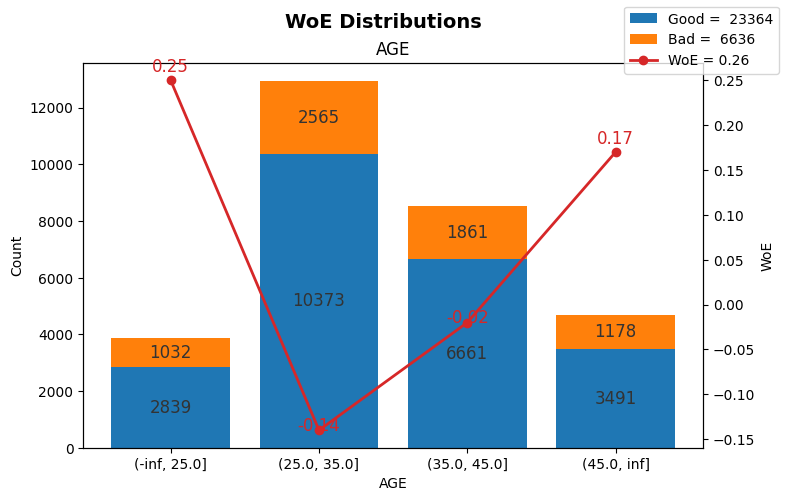

In [28]:
# 根据默认参数，将特征分箱，计算WoE,并展示图形
plot_woe(data,'AGE')

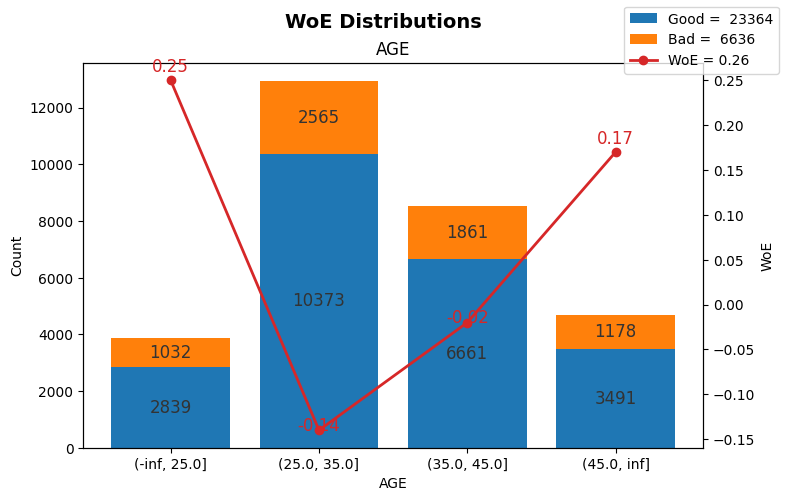

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02


In [29]:
# 根据默认参数，将特征分箱，并计算WoE,并展示图形 和 数据
plot_woe(data,'AGE',return_data =True)

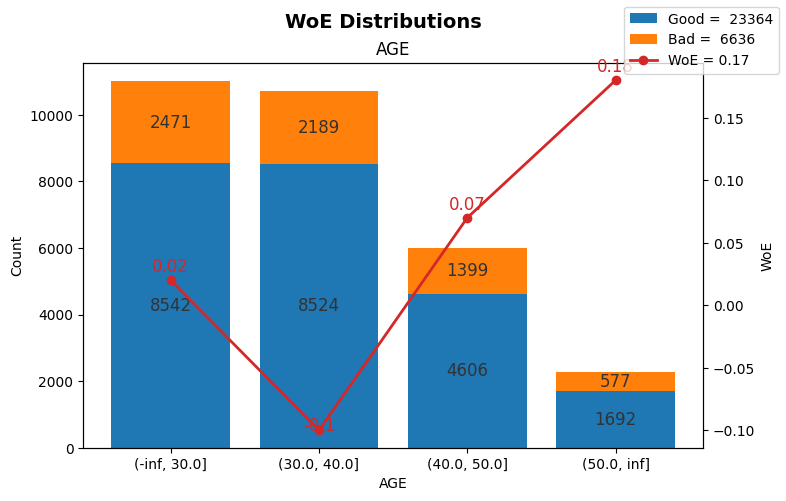

In [30]:
# 根据指定切分点计算WoE,并展示图形
plot_woe(data,'AGE',bins=[-inf,30,40,50,inf])

In [31]:
get_woe_iv(data,'AGE',bins=[-inf,30,40,50,inf])

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 30.0]",11013,2471,8542,36.71%,37.24%,36.56%,22.44%,0.02,0.0,0.01
1,AGE,2,"(30.0, 40.0]",10713,2189,8524,35.71%,32.99%,36.48%,20.43%,-0.10,0.0,0.01
2,AGE,3,"(40.0, 50.0]",6005,1399,4606,20.02%,21.08%,19.71%,23.30%,0.07,0.0,0.01
3,AGE,4,"(50.0, inf]",2269,577,1692,7.56%,8.69%,7.24%,25.43%,0.18,0.0,0.01


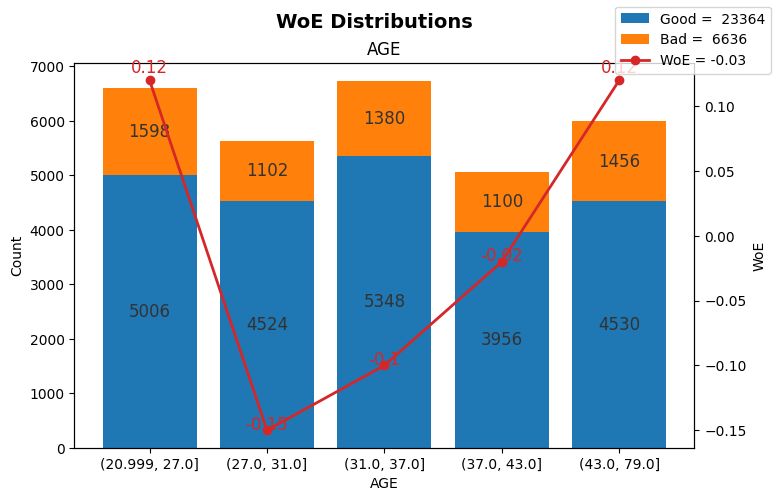

In [32]:
# 根据等频分箱，将特征分为5箱，并计算WoE,并展示图形
plot_woe(data,'AGE',qcut=5)

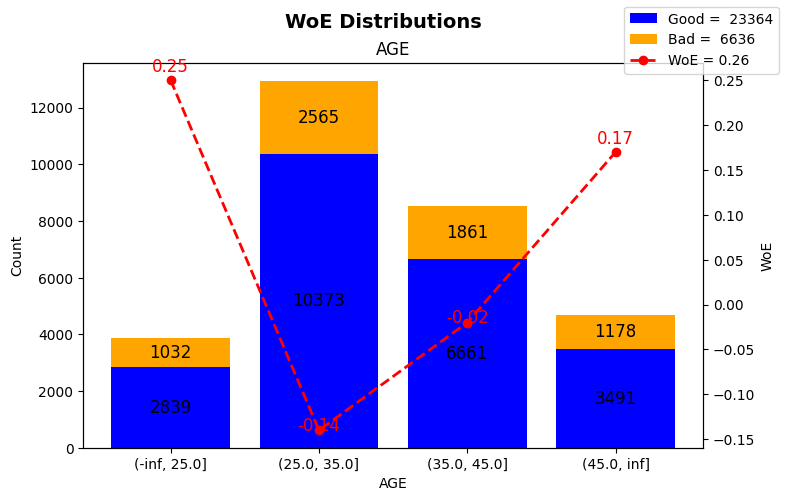

In [33]:
# 根据默认的决策树方法分箱，并计算WoE,设置图形的颜色和样式，并展示图形
plot_woe(data,'AGE',color=['blue','orange','red','black'],linewidth=2,linestyle='--')

## 计算 IV 并绘图

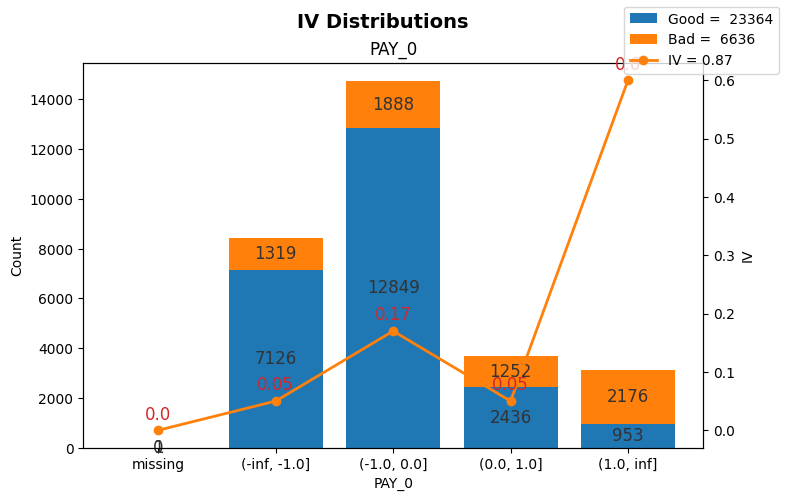

In [34]:
# 根据默认的决策树方法分箱，并计算IV，展示图形
plot_iv(data,'PAY_0')

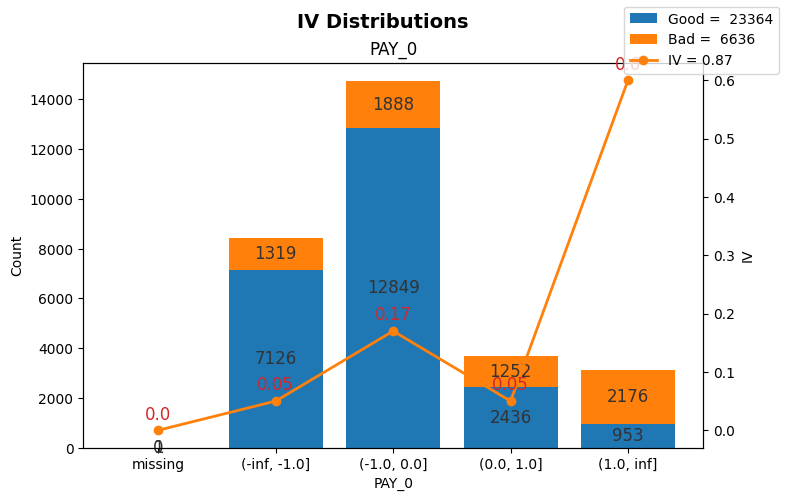

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,missing,1,1,0,0.00%,0.02%,0.00%,100.00%,0.00,0.00,0.87
1,PAY_0,2,"(-inf, -1.0]",8445,1319,7126,28.15%,19.88%,30.50%,15.62%,-0.43,0.05,0.87
2,PAY_0,3,"(-1.0, 0.0]",14737,1888,12849,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.87
3,PAY_0,4,"(0.0, 1.0]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.87
4,PAY_0,5,"(1.0, inf]",3129,2176,953,10.43%,32.79%,4.08%,69.54%,2.08,0.60,0.87


In [35]:
# 根据默认的决策树方法分箱，并计算IV，展示图形 和 数据
plot_iv(data,'PAY_0',return_data=True)

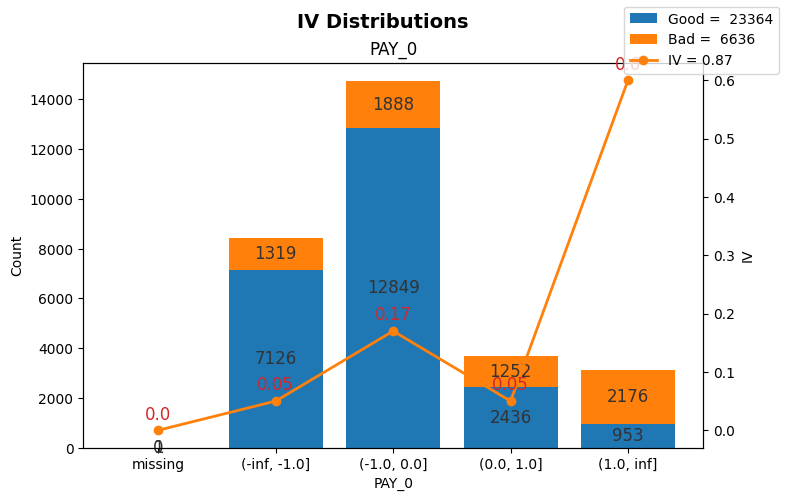

In [36]:
# 根据决策树方法分箱，并计算IV，展示图形
plot_iv(data,'PAY_0',method='tree')

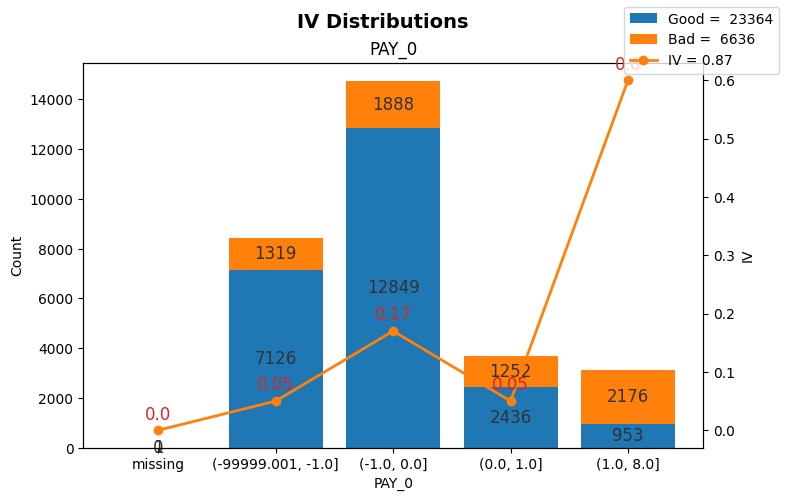

In [37]:
# 根据等频分箱，将特征分为5箱，并计算IV,展示图形
plot_iv(data,'PAY_0',qcut=5)

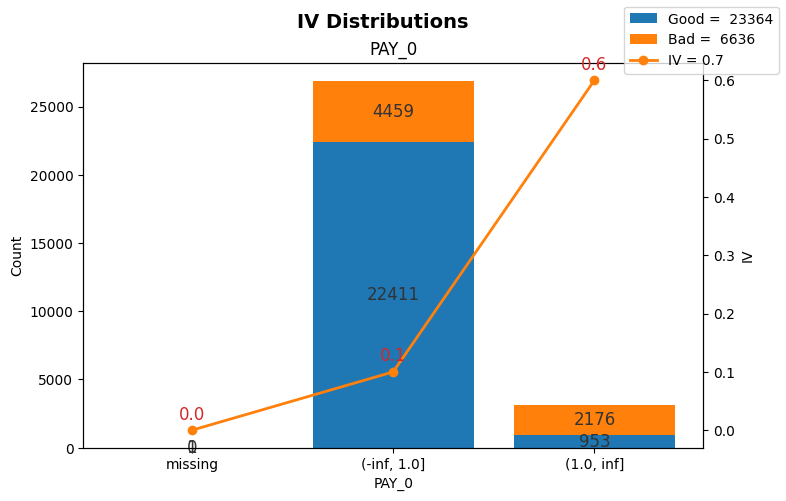

In [38]:
# 根据指定的切分点，将特征分箱，并计算IV,展示图形
plot_iv(data,'PAY_0',bins=[-inf,1,inf])

### 获取列的数据类型，离散型、连续型

In [39]:
col_types = get_col_type(data)
col_types

,Name,Type
0,ID,continuous
1,LIMIT_BAL,continuous
2,SEX,continuous
3,EDUCATION,continuous
4,MARRIAGE,continuous
5,AGE,continuous
6,PAY_0,continuous
7,PAY_2,continuous
8,PAY_3,continuous
9,PAY_4,continuous


## 决策树分箱

In [40]:
# 根据决策树方法，获取特征的分箱切分点结果
get_tree_bins(data, 'AGE', max_leaf_nodes=4,min_samples_leaf=0.05)

[-inf, 25.0, 35.0, 45.0, inf]

## 批量决策树分箱

In [41]:
col_bins = get_col_bin(data,max_leaf_nodes=4)
col_bins

,Name,Bins
0,ID,"[-inf, 15947.0, 18455.0, 26441.0, inf]"
1,LIMIT_BAL,"[-inf, 40000.0, 140000.0, 360000.0, inf]"
2,SEX,"[-inf, 1.0, inf]"
3,EDUCATION,"[-inf, 1.0, 2.0, inf]"
4,MARRIAGE,"[-inf, 1.0, inf]"
5,AGE,"[-inf, 25.0, 35.0, 45.0, inf]"
6,PAY_0,"[-inf, -1.0, 0.0, 1.0, inf]"
7,PAY_2,"[-inf, -2.0, -1.0, 1.0, inf]"
8,PAY_3,"[-inf, -2.0, -1.0, 1.0, inf]"
9,PAY_4,"[-inf, -2.0, -1.0, 0.0, inf]"


## 手动调整分箱

In [42]:
data_bins_adjust = set_modify_bins(col_bins,[
['AGE',[-inf,20,30,40,50,inf]],
['BILL_AMT1',[-inf,1000,8000,50000,inf]],
])
data_bins_adjust

,Name,Bins
0,ID,"[-inf, 15947.0, 18455.0, 26441.0, inf]"
1,LIMIT_BAL,"[-inf, 40000.0, 140000.0, 360000.0, inf]"
2,SEX,"[-inf, 1.0, inf]"
3,EDUCATION,"[-inf, 1.0, 2.0, inf]"
4,MARRIAGE,"[-inf, 1.0, inf]"
5,AGE,"[-inf, 20, 30, 40, 50, inf]"
6,PAY_0,"[-inf, -1.0, 0.0, 1.0, inf]"
7,PAY_2,"[-inf, -2.0, -1.0, 1.0, inf]"
8,PAY_3,"[-inf, -2.0, -1.0, 1.0, inf]"
9,PAY_4,"[-inf, -2.0, -1.0, 0.0, inf]"


## 数据离散化

In [43]:
# 根据决策树分箱，并将数据离散化
get_data_discrete(data)

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(-inf, 15947.0]","(-inf, 40000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 25.0]",missing,"(1.0, inf]","(-2.0, -1.0]","(-2.0, -1.0]",...,"(-inf, 787.0]","(-inf, 390.0]","(-inf, 420.0]","(-inf, 21.0]","(90.0, 4979.0]","(-inf, 17.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 1.0]",1
1,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(25.0, 35.0]","(-inf, -1.0]","(1.0, inf]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(787.0, 16643.0]","(390.0, 12541.0]","(420.0, 12655.0]","(-inf, 21.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(-inf, 0.0]","(1.0, 2000.0]",1
2,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(25.0, 35.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(787.0, 16643.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(0.0, 2000.0]","(2000.0, 9844.0]",0
3,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(35.0, 45.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(0.0, 2000.0]","(1.0, 2000.0]",0
4,"(-inf, 15947.0]","(40000.0, 140000.0]","(-inf, 1.0]","(1.0, 2.0]","(-inf, 1.0]","(45.0, inf]","(-inf, -1.0]","(-1.0, 1.0]","(-2.0, -1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(15000.0, inf]","(4640.0, 16883.0]","(4327.0, inf]","(0.0, 2000.0]","(1.0, 2000.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,"(26441.0, inf]","(140000.0, 360000.0]","(-inf, 1.0]","(2.0, inf]","(-inf, 1.0]","(35.0, 45.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(79181.0, inf]","(12541.0, 51044.0]","(12655.0, 51106.0]","(4550.0, 17580.0]","(15000.0, inf]","(4640.0, 16883.0]","(1900.0, 4327.0]","(2000.0, 9980.0]","(1.0, 2000.0]",0
29996,"(26441.0, inf]","(140000.0, 360000.0]","(-inf, 1.0]","(2.0, inf]","(1.0, inf]","(35.0, 45.0]","(-inf, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]",...,"(787.0, 16643.0]","(390.0, 12541.0]","(-inf, 420.0]","(21.0, 4550.0]","(90.0, 4979.0]","(4640.0, 16883.0]","(0.0, 1900.0]","(-inf, 0.0]","(-inf, 1.0]",0
29997,"(26441.0, inf]","(-inf, 40000.0]","(-inf, 1.0]","(1.0, 2.0]","(1.0, inf]","(35.0, 45.0]","(1.0, inf]","(1.0, inf]","(1.0, inf]","(-2.0, -1.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(-inf, 21.0]","(-inf, 90.0]","(16883.0, inf]","(1900.0, 4327.0]","(0.0, 2000.0]","(2000.0, 9844.0]",1
29998,"(26441.0, inf]","(40000.0, 140000.0]","(-inf, 1.0]","(2.0, inf]","(-inf, 1.0]","(35.0, 45.0]","(0.0, 1.0]","(-2.0, -1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(390.0, 12541.0]","(12655.0, 51106.0]","(17580.0, inf]","(90.0, 4979.0]","(17.0, 4640.0]","(1900.0, 4327.0]","(9980.0, inf]","(1.0, 2000.0]",1


In [44]:
# 按照调整后的分箱结果进行离散化
data_train_discrete = get_data_discrete(data_train,col_bin = data_bins_adjust)
data_train_discrete.head()

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(18455.0, 26441.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(20.0, 30.0]","(-inf, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]",...,"(79181.0, inf]","(51044.0, inf]","(51106.0, inf]","(21.0, 4550.0]","(90.0, 4979.0]","(16883.0, inf]","(1900.0, 4327.0]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
1,"(-inf, 15947.0]","(140000.0, 360000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(20.0, 30.0]","(-inf, -1.0]","(-inf, -2.0]","(-inf, -2.0]","(-inf, -2.0]",...,"(79181.0, inf]","(390.0, 12541.0]","(420.0, 12655.0]","(21.0, 4550.0]","(90.0, 4979.0]","(16883.0, inf]","(4327.0, inf]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
2,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(-inf, 1.0]","(1.0, inf]","(20.0, 30.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
3,"(26441.0, inf]","(-inf, 40000.0]","(-inf, 1.0]","(2.0, inf]","(1.0, inf]","(20.0, 30.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(-inf, 0.0]","(0.0, 2000.0]","(-inf, 1.0]",0
4,"(18455.0, 26441.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(30.0, 40.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(51044.0, inf]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(1900.0, 4327.0]","(0.0, 2000.0]","(1.0, 2000.0]",0


## WOE 转换

In [45]:
# 使用已经离散化的数据，批量进行WoE转换
data_train_woe = get_data_woe_transform(data_train_discrete)
data_train_woe.head()

  0%|          | 0/24 [00:00<?, ?it/s]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,-0.17,0.15,-0.07,0.09,0.07,0.01,-0.42,-0.38,-0.43,-0.38,...,-0.12,-0.13,-0.11,-0.02,0.0,-0.88,-0.16,-0.22,-0.25,0
1,0.02,-0.35,-0.07,0.09,-0.06,0.01,-0.42,-0.23,-0.21,-0.16,...,-0.12,-0.15,-0.17,-0.02,0.0,-0.88,-0.47,-0.22,-0.25,0
2,0.02,0.15,-0.07,-0.18,-0.06,0.01,-0.65,-0.40,-0.30,-0.24,...,0.10,0.15,0.15,-0.02,0.0,-0.02,0.06,-0.22,-0.25,0
3,0.06,0.69,0.10,0.07,-0.06,0.01,-0.65,-0.40,-0.30,-0.24,...,0.10,0.15,0.15,-0.02,0.0,-0.02,0.46,0.06,0.37,0
4,-0.17,0.15,-0.07,0.09,0.07,-0.10,-0.65,-0.40,-0.30,-0.24,...,0.10,-0.13,0.15,-0.02,0.0,-0.02,-0.16,0.06,0.08,0


In [46]:
## 指定 criterion='discrete'，使用已经离散化的列计算WoE和IV
get_woe_iv(data_train_discrete, 'AGE',method='discrete')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(20.0, 30.0]",8289,1832,6457,36.84%,37.12%,36.76%,22.10%,0.01,0.0,0.01
1,AGE,2,"(30.0, 40.0]",7990,1626,6364,35.51%,32.94%,36.23%,20.35%,-0.10,0.0,0.01
2,AGE,3,"(40.0, 50.0]",4514,1053,3461,20.06%,21.33%,19.71%,23.33%,0.08,0.0,0.01
3,AGE,4,"(50.0, inf]",1707,425,1282,7.59%,8.61%,7.30%,24.90%,0.17,0.0,0.01


## 批量计算全部特征的IV

In [47]:
# 使用默认的决策树分箱方法，批量计算数据集所有变量的IV
data_iv = get_data_iv(data_train)  
data_iv

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.86
7,PAY_2,0.53
8,PAY_3,0.41
9,PAY_4,0.35
10,PAY_5,0.32
11,PAY_6,0.28
18,PAY_AMT1,0.18
19,PAY_AMT2,0.16
1,LIMIT_BAL,0.16
20,PAY_AMT3,0.12


## 根据离散化的数据，批量计算IV

In [48]:
# 根据离散化的数据，批量计算IV
data_iv = get_data_iv(data_train_discrete,method='discrete')  
data_iv

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.86
7,PAY_2,0.53
8,PAY_3,0.41
9,PAY_4,0.35
10,PAY_5,0.32
11,PAY_6,0.28
18,PAY_AMT1,0.18
1,LIMIT_BAL,0.17
19,PAY_AMT2,0.16
20,PAY_AMT3,0.12


## 通过最小IV >= 0.02 和最大相关性 <=0.6 筛选特征

In [49]:
# 通过最小IV >= 0.02 和最大相关性 <=0.6 筛选特征
# 只返回筛选后保留的特征
get_feature_by_ivcorr(data_train,col_iv=data_iv,keep=[],drop=[],min_iv = 0.02,max_corr=0.5,return_drop=False)

['LIMIT_BAL',
 'PAY_0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [50]:
# 通过最小IV >= 0.02 和最大相关性 <=0.6 筛选特征
# 返回筛选后保留的特征、根据IV删除的特征、根据corr删除的特征、相关矩阵
col_keep,col_drop_by_iv,col_drop_by_corr,iv_corr_result = get_feature_by_ivcorr(data_train,col_iv=data_iv,keep=[],drop=[],min_iv = 0.02,max_corr=0.5,target='target',return_drop=True)
col_keep

['LIMIT_BAL',
 'PAY_0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [51]:
#根据IV删除的特征
col_drop_by_iv

array(['BILL_AMT5', 'BILL_AMT6', 'ID', 'EDUCATION', 'BILL_AMT4',
       'BILL_AMT3', 'BILL_AMT2', 'AGE', 'SEX', 'BILL_AMT1', 'MARRIAGE'],
      dtype=object)

In [52]:
#根据corr删除的特征
col_drop_by_corr

array(['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4',
       'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1'], dtype=object)

In [53]:
# IV 和相关性矩阵
iv_corr_result.head()

,Name1,Name2,IV1,IV2,IV1-IV2,Corr
1,PAY_0,PAY_2,0.86,0.53,0.33,0.67
2,PAY_0,PAY_3,0.86,0.41,0.45,0.58
3,PAY_0,PAY_4,0.86,0.35,0.51,0.54
4,PAY_0,PAY_5,0.86,0.32,0.54,0.51
5,PAY_0,PAY_6,0.86,0.28,0.58,0.47


## 逐步回归筛选特征

In [54]:
#逐步回归选择特征
col_result = stepwise_lr(data_train)
col_result

  0%|          | 0/24 [00:00<?, ?it/s]


step 1,current:PAY_2,selected:0.0,max_pvalue:['PAY_0'],pvalue:PAY_2,pvalues:[0.0, 0.0, 0.0]
所有变量都显著

step 2,current:PAY_3,selected:0.0,max_pvalue:['PAY_0', 'PAY_2'],pvalue:PAY_3,pvalues:[0.0, 0.0, 0.0013, 0.0]
所有变量都显著

step 3,current:PAY_4,selected:0.2332,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_4,pvalues:[0.0, 0.0, 0.0019, 0.0, 0.2332]
新变量不显著

step 4,current:PAY_5,selected:0.077,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_5,pvalues:[0.0, 0.0, 0.0031, 0.0, 0.077]
新变量不显著

step 5,current:PAY_6,selected:0.2293,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_6,pvalues:[0.0, 0.0, 0.0022, 0.0, 0.2293]
新变量不显著

step 6,current:PAY_AMT1,selected:0.0,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_AMT1,pvalues:[0.0, 0.0, 0.1064, 0.0, 0.0]
新变量显著，且有老变量不显著
去掉不显著变量后目标函数下降，去掉后的aic:21172.0565,去掉前的aic:21235.9738
2
PAY_2

step 7,current:PAY_AMT2,selected:0.0,max_pvalue:['PAY_0', 'PAY_3', 'PAY_AMT1'],pvalue:PAY_AMT2,pvalues:[0.0, 0.0, 0.0, 0.0, 0.0]
所有变量都显著

step 8,current:LIMIT_BAL,se

['PAY_0',
 'PAY_3',
 'PAY_AMT1',
 'PAY_AMT2',
 'LIMIT_BAL',
 'PAY_AMT5',
 'AGE',
 'BILL_AMT2',
 'MARRIAGE']

In [55]:
#逐步回归选择特征，并显示逐步回归详情
col_result = stepwise_lr(data_train,verbose=True)
col_result

  0%|          | 0/24 [00:00<?, ?it/s]


step 1,current:PAY_2,selected:0.0,max_pvalue:['PAY_0'],pvalue:PAY_2,pvalues:[0.0, 0.0, 0.0]
所有变量都显著

step 2,current:PAY_3,selected:0.0,max_pvalue:['PAY_0', 'PAY_2'],pvalue:PAY_3,pvalues:[0.0, 0.0, 0.0013, 0.0]
所有变量都显著

step 3,current:PAY_4,selected:0.2332,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_4,pvalues:[0.0, 0.0, 0.0019, 0.0, 0.2332]
新变量不显著

step 4,current:PAY_5,selected:0.077,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_5,pvalues:[0.0, 0.0, 0.0031, 0.0, 0.077]
新变量不显著

step 5,current:PAY_6,selected:0.2293,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_6,pvalues:[0.0, 0.0, 0.0022, 0.0, 0.2293]
新变量不显著

step 6,current:PAY_AMT1,selected:0.0,max_pvalue:['PAY_0', 'PAY_2', 'PAY_3'],pvalue:PAY_AMT1,pvalues:[0.0, 0.0, 0.1064, 0.0, 0.0]
新变量显著，且有老变量不显著
去掉不显著变量后目标函数下降，去掉后的aic:21172.0565,去掉前的aic:21235.9738
2
PAY_2

step 7,current:PAY_AMT2,selected:0.0,max_pvalue:['PAY_0', 'PAY_3', 'PAY_AMT1'],pvalue:PAY_AMT2,pvalues:[0.0, 0.0, 0.0, 0.0, 0.0]
所有变量都显著

step 8,current:LIMIT_BAL,se

['PAY_0',
 'PAY_3',
 'PAY_AMT1',
 'PAY_AMT2',
 'LIMIT_BAL',
 'PAY_AMT5',
 'AGE',
 'BILL_AMT2',
 'MARRIAGE']

In [56]:
import statsmodels.api as sm

y = data_train_woe['y']
x = data_train_woe[col_result]
x = sm.add_constant(x)

lr = sm.Logit(y, x).fit(disp=0)
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22490
Method:                           MLE   Df Model:                            9
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                  0.1693
Time:                        12:47:43   Log-Likelihood:                -9833.0
converged:                       True   LL-Null:                       -11838.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2680      0.018    -69.592      0.000      -1.304      -1.232
PAY_0          0.7963      0.021     38.805      0.000       0.756       0.837
PAY_3          0.4033      0.031     12.905      0.000       0.342       0.465
PAY_AMT1       0.3195      0.048      6.596      0.000       0.225       0.415
PAY_AMT2       0.1292      0.053      2.423      0.015       0.025       0.234
LIMIT_BAL      0.5758      0.050     11.472      0.000       0.477       0.674
PAY_AMT5       0.4061      0.068      5.931      0.000       0.272       0.540
AGE            0.3250      0.217      1.501      0.133      -0.099       0.749
BILL_AMT2     -0.9066      0.205     -4.429      0.000      -1.308      -0.505
MARRIAGE       1.3042      0.282      4.619      0.000       0.751       1.858
==============================================================================
"""

## 查看特征相关性图

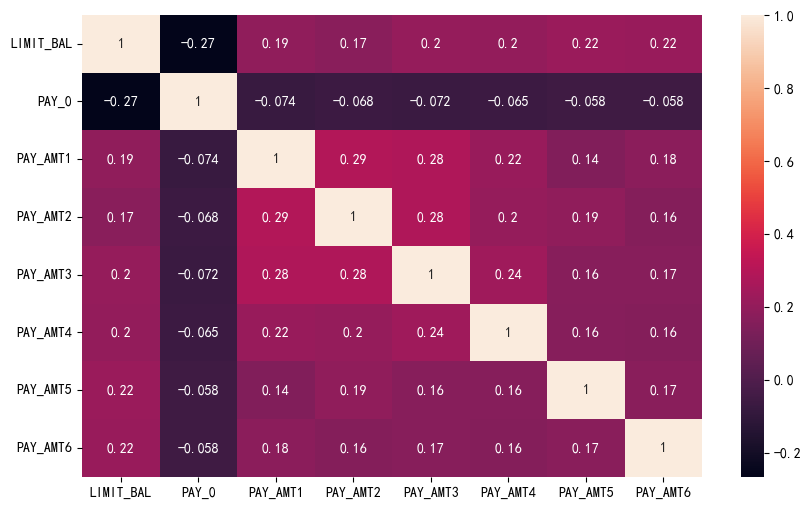

In [57]:
plot_corr(data_train[col_keep])

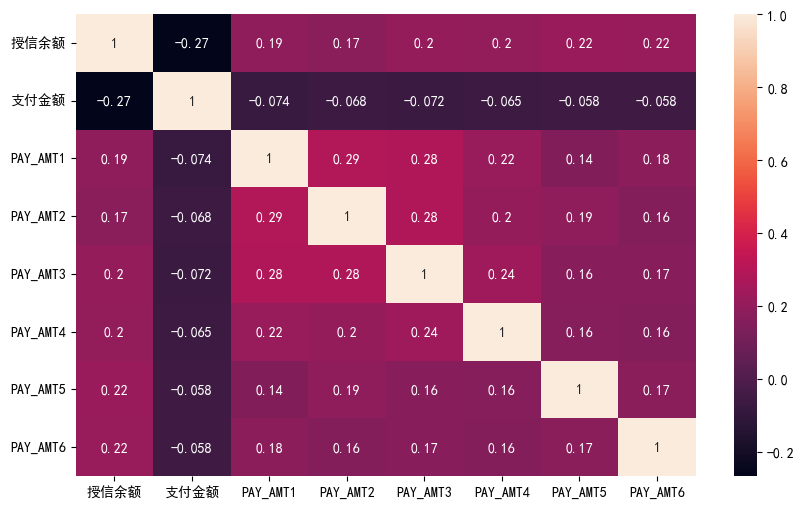

In [58]:
# 相关性表，添加中文
plot_corr(data_train[col_keep],col_dict = col_dict)

In [59]:
# 批量计算WoE，使用默认的决策树分箱方法
get_data_woe(data)  

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,WoE
6,PAY_0,1.58
10,PAY_5,0.74
11,PAY_6,0.69
9,PAY_4,0.57
7,PAY_2,0.45
8,PAY_3,0.40
5,AGE,0.26
0,ID,0.20
12,BILL_AMT1,0.04
2,SEX,0.04


In [60]:
# 批量计算IV，等频分箱，分为5箱
get_data_iv(data,qcut=5)  

  0%|          | 0/24 [00:00<?, ?it/s]

,Name,IV
6,PAY_0,0.87
7,PAY_2,0.54
8,PAY_3,0.41
9,PAY_4,0.36
10,PAY_5,0.33
11,PAY_6,0.28
1,LIMIT_BAL,0.16
18,PAY_AMT1,0.15
19,PAY_AMT2,0.14
20,PAY_AMT3,0.12


## 获取模型变量的IV表单

In [61]:
#获取模型变量的IV表单
get_model_iv(data_train_discrete[col_keep+['y']],data_iv,col_bins=data_bins_adjust,col_dict=col_dict,col_types=col_types)  

  0%|          | 0/9 [00:00<?, ?it/s]

,No.,Name,Label,Type,Bins No.,Bin,Bins,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.,Style
0,1,PAY_0,支付金额,continuous,1,missing,"[-inf, -1.0, 0.0, 1.0, inf]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.86,0.00,0
1,1,PAY_0,支付金额,continuous,2,"(-inf, -1.0]","[-inf, -1.0, 0.0, 1.0, inf]",6288,977,5311,27.95%,19.79%,30.24%,15.54%,-0.42,0.04,0.86,-0.42,0
2,1,PAY_0,支付金额,continuous,3,"(-1.0, 0.0]","[-inf, -1.0, 0.0, 1.0, inf]",11109,1417,9692,49.37%,28.71%,55.18%,12.76%,-0.65,0.17,0.86,-0.65,0
3,1,PAY_0,支付金额,continuous,4,"(0.0, 1.0]","[-inf, -1.0, 0.0, 1.0, inf]",2767,921,1846,12.30%,18.66%,10.51%,33.29%,0.57,0.05,0.86,0.57,0
4,1,PAY_0,支付金额,continuous,5,"(1.0, inf]","[-inf, -1.0, 0.0, 1.0, inf]",2336,1621,715,10.38%,32.84%,4.07%,69.39%,2.09,0.60,0.86,2.09,0
5,2,PAY_AMT1,,continuous,1,missing,"[-inf, 21.0, 4550.0, 17580.0, inf]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.18,0.00,1
6,2,PAY_AMT1,,continuous,2,"(-inf, 21.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",4055,1438,2617,18.02%,29.13%,14.90%,35.46%,0.67,0.10,0.18,0.67,1
7,2,PAY_AMT1,,continuous,3,"(21.0, 4550.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",11940,2585,9355,53.07%,52.37%,53.26%,21.65%,-0.02,0.00,0.18,-0.02,1
8,2,PAY_AMT1,,continuous,4,"(4550.0, 17580.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",5310,798,4512,23.60%,16.17%,25.69%,15.03%,-0.46,0.04,0.18,-0.46,1
9,2,PAY_AMT1,,continuous,5,"(17580.0, inf]","[-inf, 21.0, 4550.0, 17580.0, inf]",1195,115,1080,5.31%,2.33%,6.15%,9.62%,-0.97,0.04,0.18,-0.97,1


## 评分卡开发

In [62]:
# 按照默认参数，开发评分卡
get_scorecard(data_train[col_keep + ['y']] ,data_bins_adjust)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

,No.,Name,Label,Type,Bins No.,Bin,Bins,#Total,#Bad,#Good,...,%BadRate,WoE,IV,Total IV,WoE.,Style,Intercept,Coef,Base Score,Score
0,1,PAY_0,,continuous,1,missing,"[-inf, -1.0, 0.0, 1.0, inf]",0,0,0,...,0.00%,0.00,0.00,0.86,0.00,0,-1.27,0.91,600,-0.0
1,1,PAY_0,,continuous,2,"(-inf, -1.0]","[-inf, -1.0, 0.0, 1.0, inf]",6288,977,5311,...,15.54%,-0.42,0.04,0.86,-0.42,0,-1.27,0.91,600,11.0
2,1,PAY_0,,continuous,3,"(-1.0, 0.0]","[-inf, -1.0, 0.0, 1.0, inf]",11109,1417,9692,...,12.76%,-0.65,0.17,0.86,-0.65,0,-1.27,0.91,600,17.0
3,1,PAY_0,,continuous,4,"(0.0, 1.0]","[-inf, -1.0, 0.0, 1.0, inf]",2767,921,1846,...,33.29%,0.57,0.05,0.86,0.57,0,-1.27,0.91,600,-15.0
4,1,PAY_0,,continuous,5,"(1.0, inf]","[-inf, -1.0, 0.0, 1.0, inf]",2336,1621,715,...,69.39%,2.09,0.60,0.86,2.09,0,-1.27,0.91,600,-55.0
5,2,PAY_AMT1,,continuous,1,missing,"[-inf, 21.0, 4550.0, 17580.0, inf]",0,0,0,...,0.00%,0.00,0.00,0.18,0.00,1,-1.27,0.14,600,-0.0
6,2,PAY_AMT1,,continuous,2,"(-inf, 21.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",4055,1438,2617,...,35.46%,0.67,0.10,0.18,0.67,1,-1.27,0.14,600,-3.0
7,2,PAY_AMT1,,continuous,3,"(21.0, 4550.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",11940,2585,9355,...,21.65%,-0.02,0.00,0.18,-0.02,1,-1.27,0.14,600,0.0
8,2,PAY_AMT1,,continuous,4,"(4550.0, 17580.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",5310,798,4512,...,15.03%,-0.46,0.04,0.18,-0.46,1,-1.27,0.14,600,2.0
9,2,PAY_AMT1,,continuous,5,"(17580.0, inf]","[-inf, 21.0, 4550.0, 17580.0, inf]",1195,115,1080,...,9.62%,-0.97,0.04,0.18,-0.97,1,-1.27,0.14,600,4.0


In [63]:
# 设置数据精度，并返回逻辑回归模型的详细内容
scorecard,lr,a,b = get_scorecard(data_train[col_keep + ['y']] ,data_bins_adjust,precision=4,return_lr=True)
scorecard.to_excel('d:/scorecard.xlsx')

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [64]:
# 查看逻辑回归模型的详细内容
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22491
Method:                           MLE   Df Model:                            8
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                  0.1615
Time:                        12:47:48   Log-Likelihood:                -9925.5
converged:                       True   LL-Null:                       -11838.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2731      0.018    -70.247      0.000      -1.309      -1.238
LIMIT_BAL      0.5425      0.045     11.958      0.000       0.454       0.631
PAY_0          0.9110      0.019     48.360      0.000       0.874       0.948
PAY_AMT1       0.1443      0.050      2.912      0.004       0.047       0.241
PAY_AMT2       0.2597      0.053      4.855      0.000       0.155       0.364
PAY_AMT3       0.2203      0.062      3.542      0.000       0.098       0.342
PAY_AMT4       0.1442      0.071      2.035      0.042       0.005       0.283
PAY_AMT5       0.1869      0.073      2.546      0.011       0.043       0.331
PAY_AMT6       0.0598      0.074      0.807      0.420      -0.085       0.205
==============================================================================
"""

## 检查VIF

In [65]:
get_vif(data_train_woe,data_train_woe.columns,return_data=True)

(2.97,
     variables   VIF
 0          ID  1.02
 1   LIMIT_BAL  1.48
 2         SEX  1.02
 3   EDUCATION  1.12
 4    MARRIAGE  1.06
 5         AGE  1.03
 6       PAY_0  1.95
 7       PAY_2  2.91
 8       PAY_3  2.73
 9       PAY_4  2.78
 10      PAY_5  2.97
 11      PAY_6  2.17
 12  BILL_AMT1  1.94
 13  BILL_AMT2  1.90
 14  BILL_AMT3  2.10
 15  BILL_AMT4  1.56
 16  BILL_AMT5  2.30
 17  BILL_AMT6  1.93
 18   PAY_AMT1  1.90
 19   PAY_AMT2  1.89
 20   PAY_AMT3  1.91
 21   PAY_AMT4  2.07
 22   PAY_AMT5  1.82
 23   PAY_AMT6  1.68)

In [66]:
# 查看评分卡模型的参数
print('a:',a,'','b:',b)

a: 563.3758572004575  b: 28.85390081777927


## 预测模型分数

In [67]:
# 预测模型分数
data_predict_score = get_predict_score(data_train,scorecard,precision=2)
data_predict_score

  0%|          | 0/8 [00:00<?, ?it/s]

,PAY_0,PAY_0_Score,PAY_AMT1,PAY_AMT1_Score,LIMIT_BAL,LIMIT_BAL_Score,PAY_AMT2,PAY_AMT2_Score,PAY_AMT3,PAY_AMT3_Score,PAY_AMT4,PAY_AMT4_Score,PAY_AMT5,PAY_AMT5_Score,PAY_AMT6,PAY_AMT6_Score,y,Score,Proba
0,-1,11.0,1671.0,0.0,120000.0,-2.0,380.0,-0.0,131062.0,6.0,2000.0,1.0,3000.0,1.0,3000.0,0.0,0,617.0,0.13
1,-2,11.0,1468.0,0.0,200000.0,5.0,2321.0,-0.0,163597.0,6.0,6680.0,2.0,3963.0,1.0,2514.0,0.0,0,625.0,0.11
2,0,17.0,4038.0,0.0,80000.0,-2.0,3199.0,-0.0,914.0,0.0,850.0,-0.0,2055.0,1.0,8318.0,0.0,0,616.0,0.14
3,0,17.0,1596.0,0.0,20000.0,-11.0,2000.0,-0.0,3000.0,0.0,0.0,-2.0,1600.0,-0.0,0.0,-1.0,0,603.0,0.20
4,0,17.0,3000.0,0.0,90000.0,-2.0,2000.0,-0.0,2000.0,0.0,2000.0,1.0,2000.0,-0.0,1087.0,-0.0,0,616.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,2,-55.0,3000.0,0.0,50000.0,-2.0,2525.0,-0.0,3900.0,0.0,0.0,-2.0,2000.0,-0.0,4500.0,0.0,1,541.0,0.68
22496,-1,11.0,0.0,-3.0,210000.0,5.0,358.0,-0.0,12816.0,3.0,0.0,-2.0,102.0,-0.0,210.0,-0.0,0,614.0,0.15
22497,1,-15.0,0.0,-3.0,390000.0,11.0,1266.0,-0.0,0.0,-3.0,0.0,-2.0,0.0,-2.0,0.0,-1.0,0,585.0,0.32
22498,0,17.0,1700.0,0.0,30000.0,-11.0,1600.0,-0.0,1287.0,0.0,1296.0,-0.0,500.0,-0.0,1550.0,-0.0,0,606.0,0.19


## 计算AUC 和 KS

  0%|          | 0/8 [00:00<?, ?it/s]

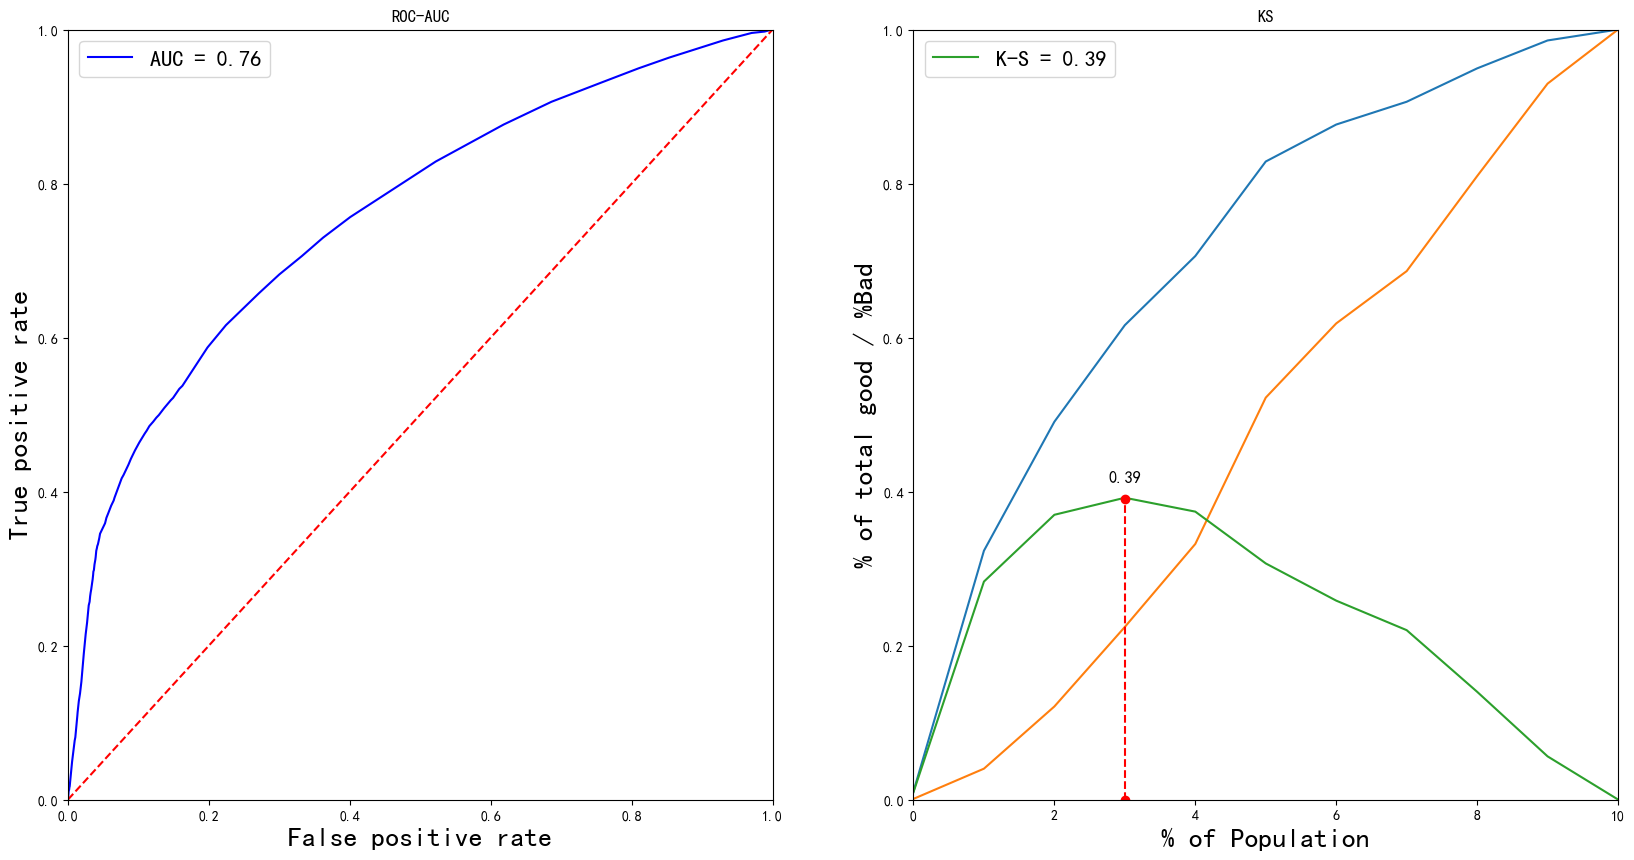

In [68]:
plot_roc_ks(data_train,scorecard)

  0%|          | 0/8 [00:00<?, ?it/s]

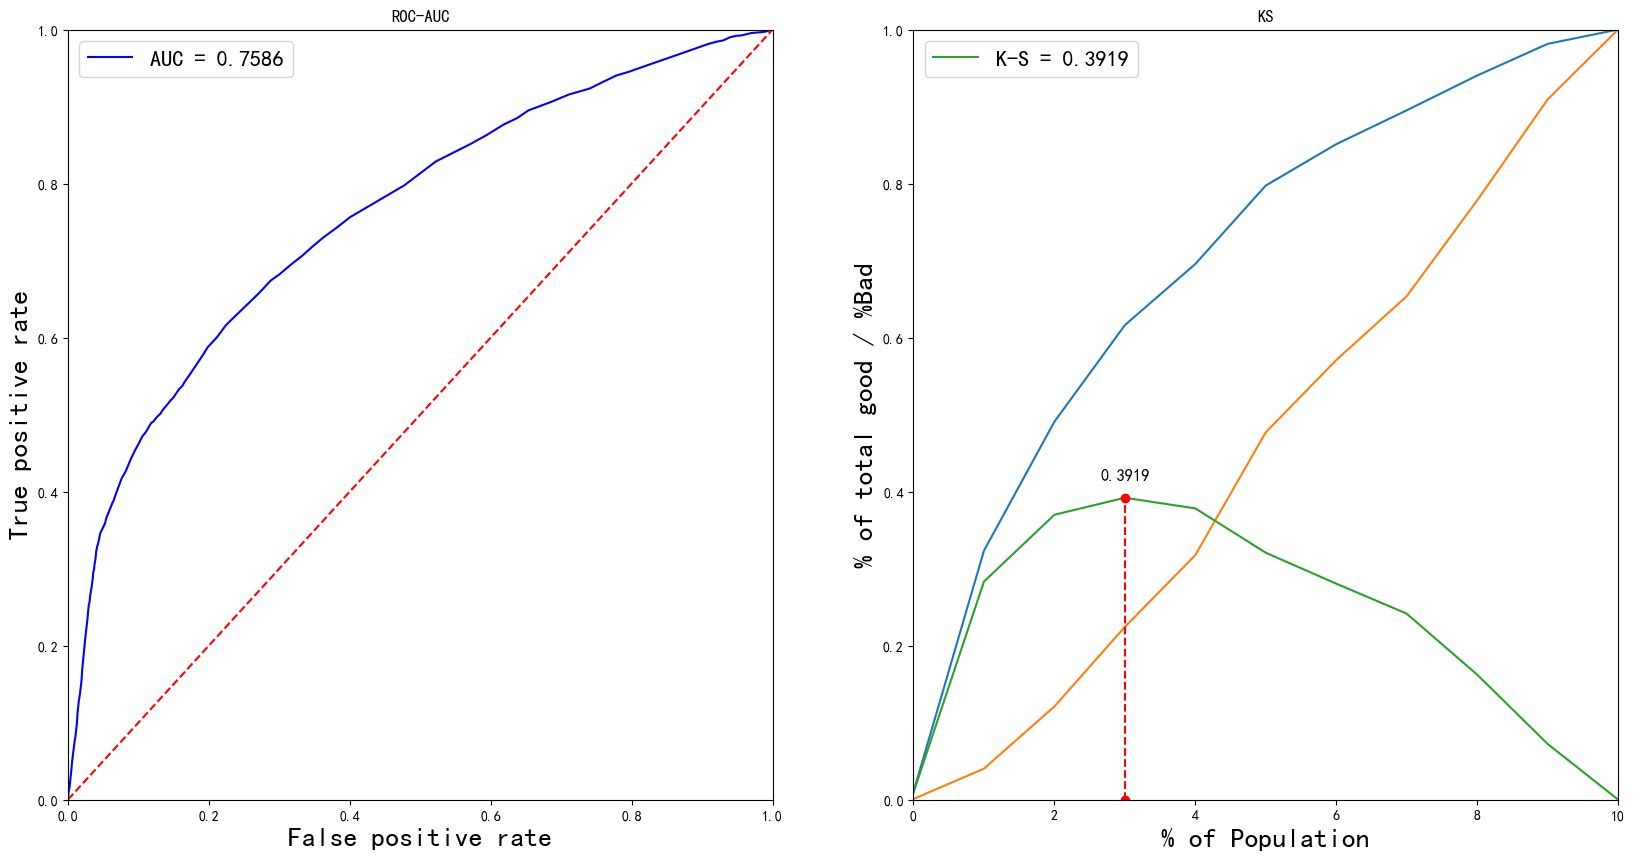

,No.,fpr,tpr,thresholds,ks
0,1,0.000740,0.009927,0.8226,0.009187
1,2,0.040082,0.323136,0.5196,0.283054
2,3,0.120872,0.490681,0.3052,0.369808
3,4,0.224152,0.616086,0.1960,0.391934
4,5,0.317411,0.695502,0.1701,0.378092
5,6,0.476885,0.797407,0.1427,0.320522
6,7,0.570713,0.851094,0.1344,0.280381
7,8,0.653610,0.895057,0.1191,0.241447
8,9,0.778012,0.940235,0.1021,0.162223
9,10,0.909075,0.981361,0.0819,0.072286


In [69]:
# 计算auc 和 ks，并返回 ks 结果数据
plot_roc_ks(data_train,scorecard,return_data=True,precision=4)

## AUC 计算

In [70]:
#根据训练集和评分卡计算auc
get_auc_by_card(data_train,scorecard)

  0%|          | 0/8 [00:00<?, ?it/s]

0.76

In [71]:
#根据预测结果，计算auc
get_auc(data_predict_score)

0.76

In [72]:
#根据预测结果，计算auc，并返回数据
get_auc(data_predict_score,return_data=True)

(0.76,
          fpr       tpr  thresholds
 0   0.000000  0.000000        1.82
 1   0.000854  0.010535        0.82
 2   0.001594  0.012966        0.81
 3   0.001993  0.015802        0.80
 4   0.002391  0.017220        0.79
 ..       ...       ...         ...
 75  0.929743  0.985818        0.08
 76  0.970223  0.995543        0.07
 77  0.988727  0.997366        0.06
 78  0.998292  0.999797        0.05
 79  1.000000  1.000000        0.04
 
 [80 rows x 3 columns])

## KS 计算

In [73]:
#根据训练集和评分卡计算ks
get_ks_by_card(data_train,scorecard)

  0%|          | 0/8 [00:00<?, ?it/s]

0.39

In [74]:
#根据预测结果，计算ks
get_ks(data_predict_score)

0.39

In [75]:
#根据预测结果，计算ks，并返回数据
get_ks(data_predict_score,return_data=True)

(0.39,
    No.          Proba  #Total  #Bad  #Good  %Total    %Bad   %Good %BadRate  \
 0    1  (0.039, 0.08]    2759   180   2579  12.26%   3.65%  14.68%    6.52%   
 1    2    (0.08, 0.1]    1806   156   1650   8.03%   3.16%   9.39%    8.64%   
 2    3    (0.1, 0.12]    2748   273   2475  12.21%   5.53%  14.09%    9.93%   
 3    4   (0.12, 0.13]    1929   237   1692   8.57%   4.80%   9.63%   12.29%   
 4    5   (0.13, 0.14]    2488   356   2132  11.06%   7.21%  12.14%   14.31%   
 5    6   (0.14, 0.17]    2137   368   1769   9.50%   7.46%  10.07%   17.22%   
 6    7    (0.17, 0.2]    2258   468   1790  10.04%   9.48%  10.19%   20.73%   
 7    8    (0.2, 0.31]    1953   504   1449   8.68%  10.21%   8.25%   25.81%   
 8    9   (0.31, 0.52]    2179   840   1339   9.68%  17.02%   7.62%   38.55%   
 9   10   (0.52, 0.82]    2243  1554    689   9.97%  31.48%   3.92%   69.28%   
 
    %CumBad %CumGood    KS  
 0    3.65%   14.68%  0.11  
 1    6.81%   24.08%  0.17  
 2   12.34%   38.17%  0.

In [76]:
#根据预测结果，计算ks，并返回数据
ks,ks_data = get_ks(data_predict_score,qcut=10,method ='',return_data=True)
ks_data

,No.,Proba,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%CumBad,%CumGood,KS
0,1,"(0.039, 0.08]",2759,180,2579,12.26%,3.65%,14.68%,6.52%,3.65%,14.68%,0.11
1,2,"(0.08, 0.1]",1806,156,1650,8.03%,3.16%,9.39%,8.64%,6.81%,24.08%,0.17
2,3,"(0.1, 0.12]",2748,273,2475,12.21%,5.53%,14.09%,9.93%,12.34%,38.17%,0.26
3,4,"(0.12, 0.13]",1929,237,1692,8.57%,4.80%,9.63%,12.29%,17.14%,47.80%,0.31
4,5,"(0.13, 0.14]",2488,356,2132,11.06%,7.21%,12.14%,14.31%,24.35%,59.94%,0.36
5,6,"(0.14, 0.17]",2137,368,1769,9.50%,7.46%,10.07%,17.22%,31.81%,70.01%,0.38
6,7,"(0.17, 0.2]",2258,468,1790,10.04%,9.48%,10.19%,20.73%,41.29%,80.20%,0.39
7,8,"(0.2, 0.31]",1953,504,1449,8.68%,10.21%,8.25%,25.81%,51.50%,88.45%,0.37
8,9,"(0.31, 0.52]",2179,840,1339,9.68%,17.02%,7.62%,38.55%,68.52%,96.08%,0.28
9,10,"(0.52, 0.82]",2243,1554,689,9.97%,31.48%,3.92%,69.28%,100.00%,100.00%,0.00


## 查看评分卡分数分布 和 提升度

In [77]:
# 查看评分卡分数分布 和 提升度
get_score_dist(data_predict_score)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 561.0]",2299,1595,704,10.22%,32.31%,4.01%,69.38%,21.94%,69.38%,10.22%,6.79
1,2,"(561.0, 587.0]",2246,827,1419,9.98%,16.75%,8.08%,36.82%,21.94%,53.29%,20.20%,2.64
2,3,"(587.0, 604.0]",2433,619,1814,10.81%,12.54%,10.33%,25.44%,21.94%,43.58%,31.01%,1.41
3,4,"(604.0, 609.0]",2030,392,1638,9.02%,7.94%,9.33%,19.31%,21.94%,38.11%,40.04%,0.95
4,5,"(609.0, 615.0]",3304,503,2801,14.68%,10.19%,15.95%,15.22%,21.94%,31.97%,54.72%,0.58
5,6,"(615.0, 617.0]",1913,265,1648,8.50%,5.37%,9.38%,13.85%,21.94%,29.53%,63.22%,0.47
6,7,"(617.0, 621.0]",1673,217,1456,7.44%,4.40%,8.29%,12.97%,21.94%,27.79%,70.66%,0.39
7,8,"(621.0, 626.0]",2408,223,2185,10.70%,4.52%,12.44%,9.26%,21.94%,25.35%,81.36%,0.31
8,9,"(626.0, 633.0]",2505,203,2302,11.13%,4.11%,13.11%,8.10%,21.94%,23.28%,92.49%,0.25
9,10,"(633.0, inf]",1689,92,1597,7.51%,1.86%,9.09%,5.45%,21.94%,21.94%,100.00%,0.22


In [78]:
# 查看评分卡分数分布 和 提升度，分为5组，查看提升度
get_score_dist(data_predict_score,qcut=5)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 587.0]",4545,2422,2123,20.20%,49.07%,12.09%,53.29%,21.94%,53.29%,20.20%,2.64
1,2,"(587.0, 609.0]",4463,1011,3452,19.84%,20.48%,19.65%,22.65%,21.94%,38.11%,40.04%,0.95
2,3,"(609.0, 617.0]",5217,768,4449,23.19%,15.56%,25.33%,14.72%,21.94%,29.53%,63.22%,0.47
3,4,"(617.0, 626.0]",4081,440,3641,18.14%,8.91%,20.73%,10.78%,21.94%,25.35%,81.36%,0.31
4,5,"(626.0, inf]",4194,295,3899,18.64%,5.98%,22.20%,7.03%,21.94%,21.94%,100.00%,0.22


In [79]:
# 查看评分卡分数分布 和 提升度，分为5组，查看提升度
view_score_dist(data_predict_score,qcut=5)

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 587.0]",4545,2422,2123,20.20%,49.07%,12.09%,53.29%,21.94%,53.29%,20.20%,2.640000,2.640000
1,2,"(587.0, 609.0]",4463,1011,3452,19.84%,20.48%,19.65%,22.65%,21.94%,38.11%,40.04%,0.950000,0.950000
2,3,"(609.0, 617.0]",5217,768,4449,23.19%,15.56%,25.33%,14.72%,21.94%,29.53%,63.22%,0.470000,0.470000
3,4,"(617.0, 626.0]",4081,440,3641,18.14%,8.91%,20.73%,10.78%,21.94%,25.35%,81.36%,0.310000,0.310000
4,5,"(626.0, inf]",4194,295,3899,18.64%,5.98%,22.20%,7.03%,21.94%,21.94%,100.00%,0.220000,0.220000


In [80]:
# 查看评分卡分数分布 和 提升度，分为5组，查看提升度
view_score_dist(data_predict_score,qcut=5,color='green')

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 587.0]",4545,2422,2123,20.20%,49.07%,12.09%,53.29%,21.94%,53.29%,20.20%,2.640000,2.640000
1,2,"(587.0, 609.0]",4463,1011,3452,19.84%,20.48%,19.65%,22.65%,21.94%,38.11%,40.04%,0.950000,0.950000
2,3,"(609.0, 617.0]",5217,768,4449,23.19%,15.56%,25.33%,14.72%,21.94%,29.53%,63.22%,0.470000,0.470000
3,4,"(617.0, 626.0]",4081,440,3641,18.14%,8.91%,20.73%,10.78%,21.94%,25.35%,81.36%,0.310000,0.310000
4,5,"(626.0, inf]",4194,295,3899,18.64%,5.98%,22.20%,7.03%,21.94%,21.94%,100.00%,0.220000,0.220000


In [81]:
# 查看评分卡分数分布 和 提升度，分为5组，查看提升度
view_score_dist(data_predict_score,qcut=5,color='#02B057')

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 587.0]",4545,2422,2123,20.20%,49.07%,12.09%,53.29%,21.94%,53.29%,20.20%,2.640000,2.640000
1,2,"(587.0, 609.0]",4463,1011,3452,19.84%,20.48%,19.65%,22.65%,21.94%,38.11%,40.04%,0.950000,0.950000
2,3,"(609.0, 617.0]",5217,768,4449,23.19%,15.56%,25.33%,14.72%,21.94%,29.53%,63.22%,0.470000,0.470000
3,4,"(617.0, 626.0]",4081,440,3641,18.14%,8.91%,20.73%,10.78%,21.94%,25.35%,81.36%,0.310000,0.310000
4,5,"(626.0, inf]",4194,295,3899,18.64%,5.98%,22.20%,7.03%,21.94%,21.94%,100.00%,0.220000,0.220000


In [82]:
# 查看评分卡分数分布 和 提升度,  标题显示为中文
get_score_dist(data_predict_score,language='cn')

,序号,分数区间,#合计,#坏,#好,%合计,%坏,%好,%坏件率,%随机坏件率,%累计坏,%累计合计,提升度
0,1,"(-inf, 561.0]",2299,1595,704,10.22%,32.31%,4.01%,69.38%,21.94%,69.38%,10.22%,6.79
1,2,"(561.0, 587.0]",2246,827,1419,9.98%,16.75%,8.08%,36.82%,21.94%,53.29%,20.20%,2.64
2,3,"(587.0, 604.0]",2433,619,1814,10.81%,12.54%,10.33%,25.44%,21.94%,43.58%,31.01%,1.41
3,4,"(604.0, 609.0]",2030,392,1638,9.02%,7.94%,9.33%,19.31%,21.94%,38.11%,40.04%,0.95
4,5,"(609.0, 615.0]",3304,503,2801,14.68%,10.19%,15.95%,15.22%,21.94%,31.97%,54.72%,0.58
5,6,"(615.0, 617.0]",1913,265,1648,8.50%,5.37%,9.38%,13.85%,21.94%,29.53%,63.22%,0.47
6,7,"(617.0, 621.0]",1673,217,1456,7.44%,4.40%,8.29%,12.97%,21.94%,27.79%,70.66%,0.39
7,8,"(621.0, 626.0]",2408,223,2185,10.70%,4.52%,12.44%,9.26%,21.94%,25.35%,81.36%,0.31
8,9,"(626.0, 633.0]",2505,203,2302,11.13%,4.11%,13.11%,8.10%,21.94%,23.28%,92.49%,0.25
9,10,"(633.0, inf]",1689,92,1597,7.51%,1.86%,9.09%,5.45%,21.94%,21.94%,100.00%,0.22


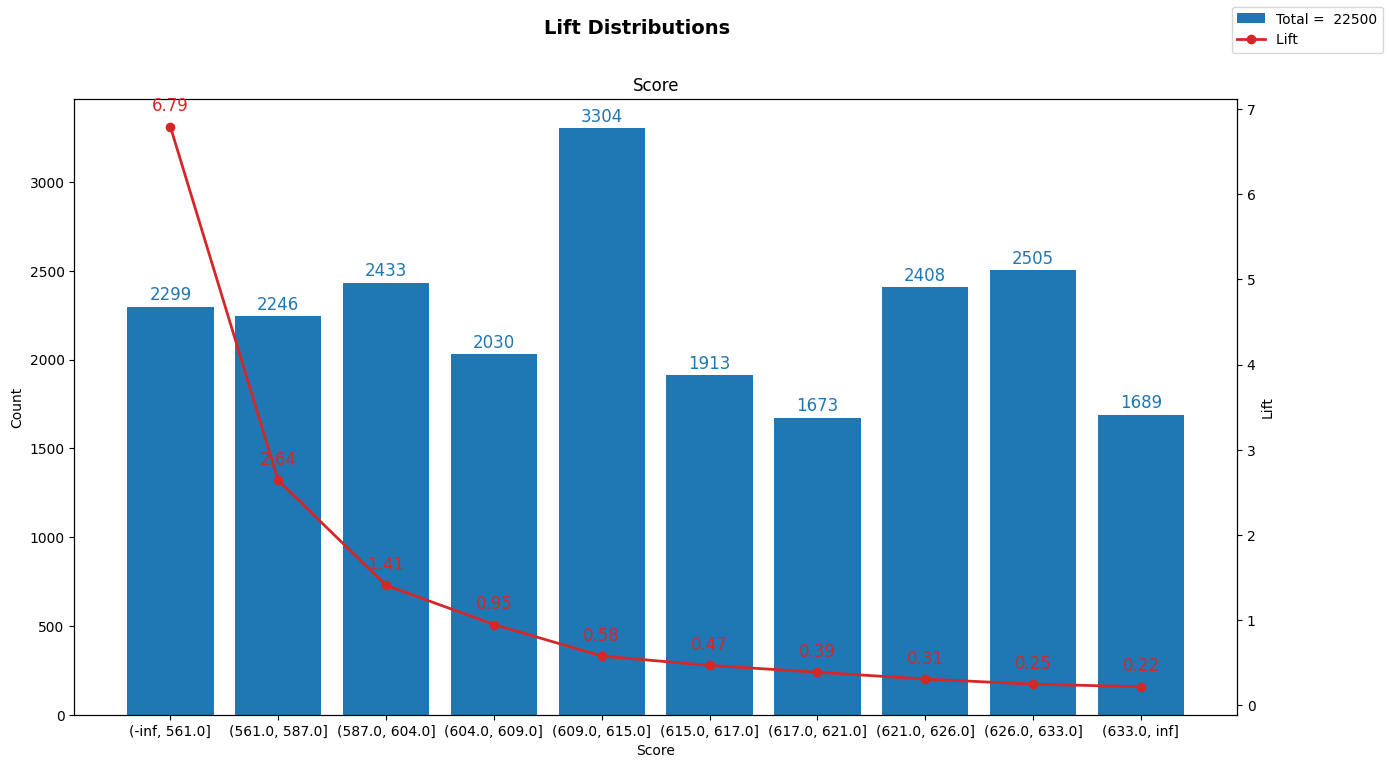

In [83]:
# 绘制提升度图    
plot_lift(data_predict_score)

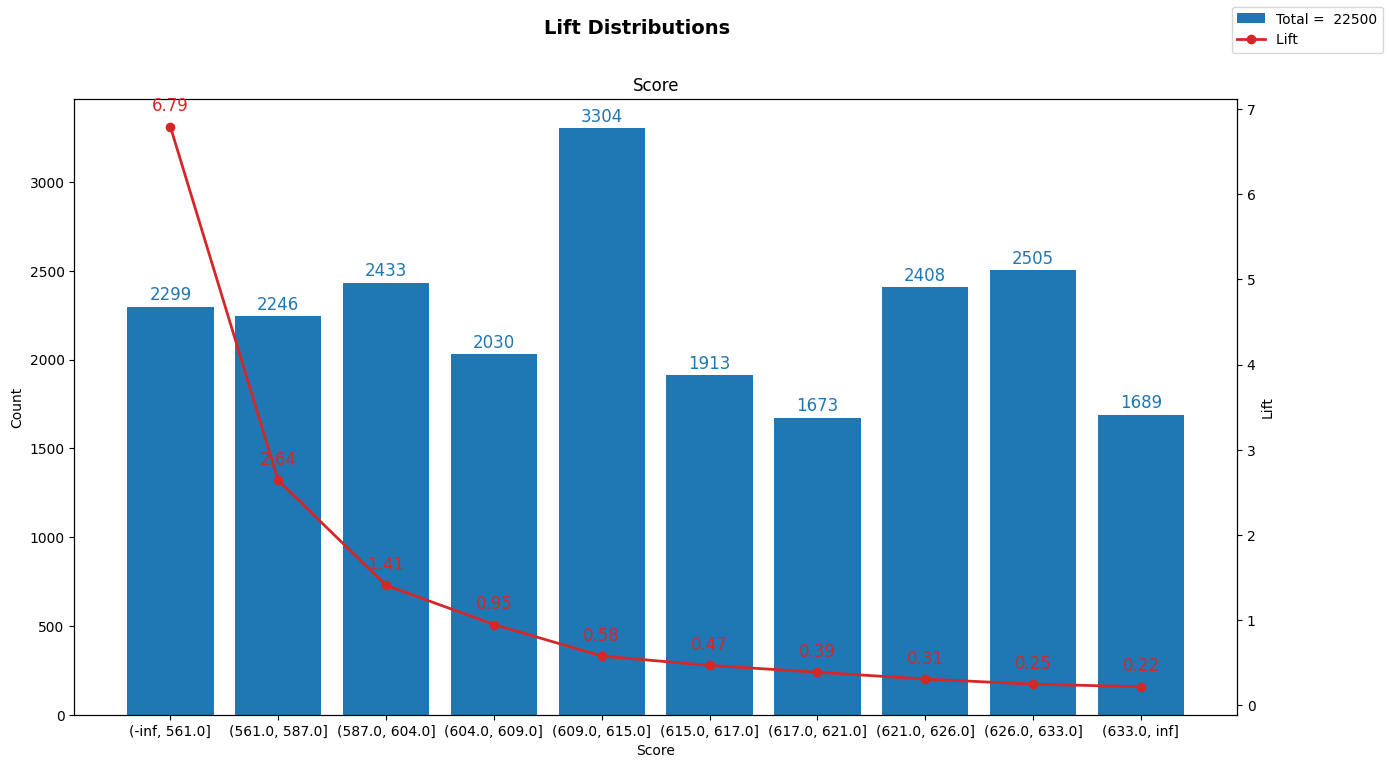

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 561.0]",2299,1595,704,10.22%,32.31%,4.01%,69.38%,21.94%,69.38%,10.22%,6.79
1,2,"(561.0, 587.0]",2246,827,1419,9.98%,16.75%,8.08%,36.82%,21.94%,53.29%,20.20%,2.64
2,3,"(587.0, 604.0]",2433,619,1814,10.81%,12.54%,10.33%,25.44%,21.94%,43.58%,31.01%,1.41
3,4,"(604.0, 609.0]",2030,392,1638,9.02%,7.94%,9.33%,19.31%,21.94%,38.11%,40.04%,0.95
4,5,"(609.0, 615.0]",3304,503,2801,14.68%,10.19%,15.95%,15.22%,21.94%,31.97%,54.72%,0.58
5,6,"(615.0, 617.0]",1913,265,1648,8.50%,5.37%,9.38%,13.85%,21.94%,29.53%,63.22%,0.47
6,7,"(617.0, 621.0]",1673,217,1456,7.44%,4.40%,8.29%,12.97%,21.94%,27.79%,70.66%,0.39
7,8,"(621.0, 626.0]",2408,223,2185,10.70%,4.52%,12.44%,9.26%,21.94%,25.35%,81.36%,0.31
8,9,"(626.0, 633.0]",2505,203,2302,11.13%,4.11%,13.11%,8.10%,21.94%,23.28%,92.49%,0.25
9,10,"(633.0, inf]",1689,92,1597,7.51%,1.86%,9.09%,5.45%,21.94%,21.94%,100.00%,0.22


In [84]:
# 绘制提升度图，并输出提升度表格
plot_lift(data_predict_score,return_data=True)

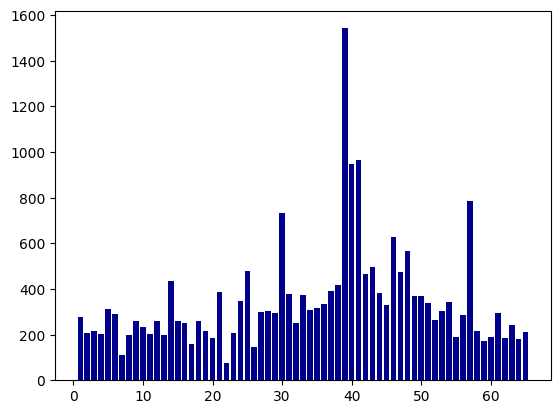

In [85]:
# Scorecard score distribution
import matplotlib.pyplot as plt
plt.style.use('default')
data_train_score = get_score_dist(data_predict_score,qcut=100)
x=data_train_score['No.']
y=data_train_score['#Total']

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.bar(x,y,align='center',color='darkblue')
plt.show()

## 模型稳定型 PSI计算

In [86]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
get_psi(data_train_score,data_test_score)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,Score,"(-inf, 561.0]",3078,2299,779,10.26%,10.22%,10.39%,0.00,0.06
1,2,Score,"(561.0, 587.0]",2995,2246,749,9.98%,9.98%,9.99%,0.00,0.06
2,3,Score,"(587.0, 604.0]",3132,2433,699,10.44%,10.81%,9.32%,0.00,0.06
3,4,Score,"(604.0, 609.0]",2659,2030,629,8.86%,9.02%,8.39%,0.00,0.06
4,5,Score,"(609.0, 615.0]",4013,3304,709,13.38%,14.68%,9.45%,0.02,0.06
5,6,Score,"(615.0, 617.0]",2764,1913,851,9.21%,8.50%,11.35%,0.01,0.06
6,7,Score,"(617.0, 621.0]",2415,1673,742,8.05%,7.44%,9.89%,0.01,0.06
7,8,Score,"(621.0, 626.0]",3173,2408,765,10.58%,10.70%,10.20%,0.00,0.06
8,9,Score,"(626.0, 633.0]",3254,2505,749,10.85%,11.13%,9.99%,0.00,0.06
9,10,Score,"(633.0, inf]",2517,1689,828,8.39%,7.51%,11.04%,0.01,0.06


In [87]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
view_psi(data_train_score,data_test_score)

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 561.0]",3078,2299,779,10.26%,10.22%,10.39%,0.000000,0.060000,0.000000
1,2,Score,"(561.0, 587.0]",2995,2246,749,9.98%,9.98%,9.99%,0.000000,0.060000,0.000000
2,3,Score,"(587.0, 604.0]",3132,2433,699,10.44%,10.81%,9.32%,0.000000,0.060000,0.000000
3,4,Score,"(604.0, 609.0]",2659,2030,629,8.86%,9.02%,8.39%,0.000000,0.060000,0.000000
4,5,Score,"(609.0, 615.0]",4013,3304,709,13.38%,14.68%,9.45%,0.020000,0.060000,0.020000
5,6,Score,"(615.0, 617.0]",2764,1913,851,9.21%,8.50%,11.35%,0.010000,0.060000,0.010000
6,7,Score,"(617.0, 621.0]",2415,1673,742,8.05%,7.44%,9.89%,0.010000,0.060000,0.010000
7,8,Score,"(621.0, 626.0]",3173,2408,765,10.58%,10.70%,10.20%,0.000000,0.060000,0.000000
8,9,Score,"(626.0, 633.0]",3254,2505,749,10.85%,11.13%,9.99%,0.000000,0.060000,0.000000
9,10,Score,"(633.0, inf]",2517,1689,828,8.39%,7.51%,11.04%,0.010000,0.060000,0.010000


In [88]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
view_psi(data_train_score,data_test_score,color='green')

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 561.0]",3078,2299,779,10.26%,10.22%,10.39%,0.000000,0.060000,0.000000
1,2,Score,"(561.0, 587.0]",2995,2246,749,9.98%,9.98%,9.99%,0.000000,0.060000,0.000000
2,3,Score,"(587.0, 604.0]",3132,2433,699,10.44%,10.81%,9.32%,0.000000,0.060000,0.000000
3,4,Score,"(604.0, 609.0]",2659,2030,629,8.86%,9.02%,8.39%,0.000000,0.060000,0.000000
4,5,Score,"(609.0, 615.0]",4013,3304,709,13.38%,14.68%,9.45%,0.020000,0.060000,0.020000
5,6,Score,"(615.0, 617.0]",2764,1913,851,9.21%,8.50%,11.35%,0.010000,0.060000,0.010000
6,7,Score,"(617.0, 621.0]",2415,1673,742,8.05%,7.44%,9.89%,0.010000,0.060000,0.010000
7,8,Score,"(621.0, 626.0]",3173,2408,765,10.58%,10.70%,10.20%,0.000000,0.060000,0.000000
8,9,Score,"(626.0, 633.0]",3254,2505,749,10.85%,11.13%,9.99%,0.000000,0.060000,0.000000
9,10,Score,"(633.0, inf]",2517,1689,828,8.39%,7.51%,11.04%,0.010000,0.060000,0.010000


In [89]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
view_psi(data_train_score,data_test_score,color='#02B057')

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 561.0]",3078,2299,779,10.26%,10.22%,10.39%,0.000000,0.060000,0.000000
1,2,Score,"(561.0, 587.0]",2995,2246,749,9.98%,9.98%,9.99%,0.000000,0.060000,0.000000
2,3,Score,"(587.0, 604.0]",3132,2433,699,10.44%,10.81%,9.32%,0.000000,0.060000,0.000000
3,4,Score,"(604.0, 609.0]",2659,2030,629,8.86%,9.02%,8.39%,0.000000,0.060000,0.000000
4,5,Score,"(609.0, 615.0]",4013,3304,709,13.38%,14.68%,9.45%,0.020000,0.060000,0.020000
5,6,Score,"(615.0, 617.0]",2764,1913,851,9.21%,8.50%,11.35%,0.010000,0.060000,0.010000
6,7,Score,"(617.0, 621.0]",2415,1673,742,8.05%,7.44%,9.89%,0.010000,0.060000,0.010000
7,8,Score,"(621.0, 626.0]",3173,2408,765,10.58%,10.70%,10.20%,0.000000,0.060000,0.000000
8,9,Score,"(626.0, 633.0]",3254,2505,749,10.85%,11.13%,9.99%,0.000000,0.060000,0.000000
9,10,Score,"(633.0, inf]",2517,1689,828,8.39%,7.51%,11.04%,0.010000,0.060000,0.010000


In [90]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照等频分箱，分为5组，计算PSI
get_psi(data_train_score,data_test_score,col='LIMIT_BAL',qcut=5,precision=4)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,LIMIT_BAL,"(-inf, 50000.0]",7676,5855,1821,25.5867%,26.0222%,24.2800%,0.0012,0.0018
1,2,LIMIT_BAL,"(50000.0, 100000.0]",4822,3593,1229,16.0733%,15.9689%,16.3867%,0.0001,0.0018
2,3,LIMIT_BAL,"(100000.0, 180000.0]",6123,4548,1575,20.4100%,20.2133%,21.0000%,0.0003,0.0018
3,4,LIMIT_BAL,"(180000.0, 270000.0]",5421,4035,1386,18.0700%,17.9333%,18.4800%,0.0002,0.0018
4,5,LIMIT_BAL,"(270000.0, inf]",5958,4469,1489,19.8600%,19.8622%,19.8533%,0.0000,0.0018


In [91]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照指定的切分点，计算PSI
get_psi(data_train_score,data_test_score,col='LIMIT_BAL',bins=[-inf,30000,50000,100000,inf],precision=4)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,LIMIT_BAL,"(-inf, 30000.0]",4111,3109,1002,13.7033%,13.8178%,13.3600%,0.0002,0.0002
1,2,LIMIT_BAL,"(30000.0, 50000.0]",3649,2746,903,12.1633%,12.2044%,12.0400%,0.0000,0.0002
2,3,LIMIT_BAL,"(50000.0, 100000.0]",4794,3593,1201,15.9800%,15.9689%,16.0133%,0.0000,0.0002
3,4,LIMIT_BAL,"(100000.0, inf]",17446,13052,4394,58.1533%,58.0089%,58.5867%,0.0001,0.0002


In [92]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照指定的切分点，计算PSI，标题显示为中文
get_psi(data_train_score,data_test_score,col='LIMIT_BAL',bins=[-inf,30000,50000,100000,inf],precision=4,language='cn')

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,序号,名称,分组,#合计,#实际,#期望,%合计,%实际,%期望,PSI,PSI 合计
0,1,LIMIT_BAL,"(-inf, 30000.0]",4111,3109,1002,13.7033%,13.8178%,13.3600%,0.0002,0.0002
1,2,LIMIT_BAL,"(30000.0, 50000.0]",3649,2746,903,12.1633%,12.2044%,12.0400%,0.0000,0.0002
2,3,LIMIT_BAL,"(50000.0, 100000.0]",4794,3593,1201,15.9800%,15.9689%,16.0133%,0.0000,0.0002
3,4,LIMIT_BAL,"(100000.0, inf]",17446,13052,4394,58.1533%,58.0089%,58.5867%,0.0001,0.0002


In [93]:
# 批量计算所有特征的PSI
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

get_data_psi(data_train_score,data_test_score,precision=4)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

,Name,PSI
16,Score,0.0561
8,PAY_AMT3,0.0026
4,LIMIT_BAL,0.0022
17,Proba,0.0013
6,PAY_AMT2,0.0012
14,PAY_AMT6,0.0011
10,PAY_AMT4,0.0010
12,PAY_AMT5,0.0008
2,PAY_AMT1,0.0006
7,PAY_AMT2_Score,0.0006
